<a href="https://colab.research.google.com/github/milka513/Gepi_tanulas_beadando/blob/master/osszesitett.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GÉPI TANULÁS BEADANDÓ MODELLEK ISMERTETÉSE
Ebben a dokumentumban a betanított modellek eredményeit ismertetjük.

## GÉCZI DÁNIEL CSANÁD

### Decision tree


In [0]:
 #kod by Heinc Emilia
 import matplotlib.pyplot as plt
 import matplotlib.tri as mtri
 import pandas as pd
 import matplotlib as mpl
 def examine_output_decisiontree(filename, szog1, szog2):
        df=pd.read_pickle(filename)
        best_of=df[df['rank_test_score'] == 1]
        fig=plt.figure()
        ax=fig.add_subplot(111, projection='3d')
        triang=mtri.Triangulation(df['param_max_depth'],
                                  df['param_min_samples_leaf'])
        ax.plot_trisurf(triang, df['mean_test_score'], cmap='Blues')

        ax.plot_trisurf(triang, df['mean_train_score'], cmap='Reds')

        fake2Dline = mpl.lines.Line2D([0], [0], linestyle="none", c='b', marker='o')
        fake2Dline2 = mpl.lines.Line2D([1], [1], linestyle="none", c='r', marker='o')
        ax.legend([fake2Dline, fake2Dline2], ['Validációs score', 'Train score'], numpoints=1)

        ax.scatter(df[df['rank_test_score'] == 1]['param_max_depth'].values, df[df['rank_test_score'] == 1]['param_min_samples_leaf'].values,
                   df[df['rank_test_score'] == 1]['mean_test_score'].values, marker='.', s=100, c="red", alpha=1.0)
        ax.view_init(elev=szog1, azim=szog2)

        ax.set_xlabel('X: maximum melyseg')
        ax.set_ylabel('Y: level min samples')
        ax.set_zlabel('Z: elert eredmeny')
        plt.show()
        return best_of[['param_max_depth', 'param_min_samples_leaf', 'mean_test_score', 'mean_train_score']]


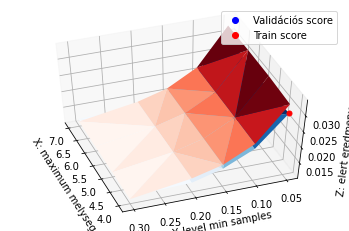

,param_max_depth,param_min_samples_leaf,mean_test_score,mean_train_score
0,4,0.05,0.029538,0.032272


In [14]:
examine_output_decisiontree('/content/gdrive/My Drive/gépi tanulás beadandó/decision_tree_model.pkl',50,160)

#### PCA-val redukált

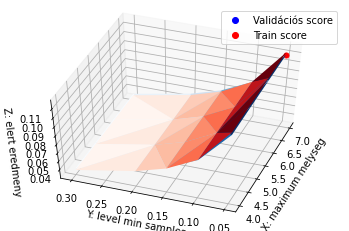

,param_max_depth,param_min_samples_leaf,mean_test_score,mean_train_score
15,7,0.05,0.111206,0.11394


In [12]:
examine_output_decisiontree('/content/gdrive/My Drive/gépi tanulás beadandó/decision_tree_model_pca_reduced.pkl',50,200)

#### SVD-vel redukált

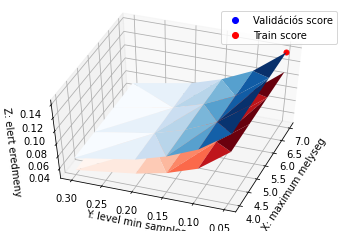

,param_max_depth,param_min_samples_leaf,mean_test_score,mean_train_score
15,7,0.05,0.13875,0.109675


In [15]:
examine_output_decisiontree('/content/gdrive/My Drive/gépi tanulás beadandó/decision_tree_model_svd_reduced.pkl',50,200)

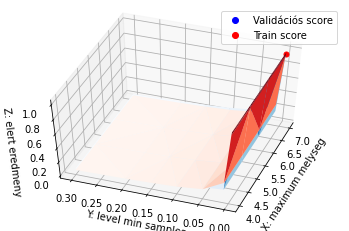

,param_max_depth,param_min_samples_leaf,mean_test_score,mean_train_score
24,7,0.0001,0.966945,0.991431


In [19]:
examine_output_decisiontree('/content/gdrive/My Drive/gépi tanulás beadandó/decision_tree_model_svd_reduced_higher.pkl',50,200)

## HEINC EMÍLIA
A feladatom az adathalmaz feldolgozása és új feature-k gyártása valamint a hiányos illetve felesleges feature-k kiszedése. A másik feladatom az ensemble modell készítése volt, annak tanítása illetve tesztelése. Ezen felül megcsináltam a train-test szétszedését is.

### Baseline model

In [0]:
from sklearn.metrics import r2_score
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

def test():
    df = pd.read_pickle('/content/gdrive/My Drive/gépi tanulás beadandó/baseline_modelr2.pkl')
    print("--------------r2 score-------------")
    best_of = df[df['rank_test_score'] == 1]
    print('n_neighbours száma',best_of['param_n_neighbors'].values[0])
    print('legjobb validacios score',best_of['mean_test_score'].values[0])
    print('hozza tartozo train score',best_of['mean_train_score'].values[0])


    base_model = KNeighborsRegressor(n_neighbors=best_of['param_n_neighbors'].values[0], weights='distance')
    base_model.fit(x_train, y_train)
    y_predict=base_model.predict(x_test)
    print('teszt score',r2_score(y_test, y_predict))
    plt.figure(figsize=(10,10))

    plt.plot(df['param_n_neighbors'], df['mean_test_score'],'r')
    plt.plot(df['param_n_neighbors'], df['mean_train_score'],'b')
    plt.show()


    print('------------mean squared error-----------')
    df = pd.read_pickle('/content/gdrive/My Drive/gépi tanulás beadandó/baseline_modelneg_mean_squared_error.pkl')
    best_of = df[df['rank_test_score'] == 1]
    print('n_neighbours száma',best_of['param_n_neighbors'].values[0])
    print('legjobb validacios score',best_of['mean_test_score'].values[0])
    print('hozza tartozo train score',best_of['mean_train_score'].values[0])
    plt.figure(figsize=(10,10))

    plt.plot(df['param_n_neighbors'], df['mean_test_score'],'r')
    plt.plot(df['param_n_neighbors'], df['mean_train_score'],'b')
    plt.show()

    base_model = KNeighborsRegressor(n_neighbors=best_of['param_n_neighbors'].values[0], weights='distance')
    base_model.fit(x_train, y_train)
    y_predict=base_model.predict(x_test)
    print('teszt score',mean_squared_error(y_test, y_predict))

--------------r2 score-------------
n_neighbours száma 5
legjobb validacios score 0.27763988161977693
hozza tartozo train score 0.999996710247307
teszt score 0.061519043598590284


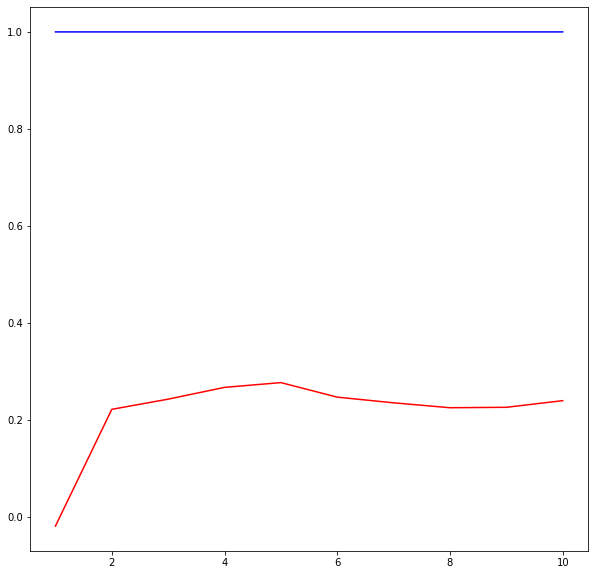

------------mean squared error-----------
n_neighbours száma 5
legjobb validacios score -26280.645040723943
hozza tartozo train score -0.13072801182557278


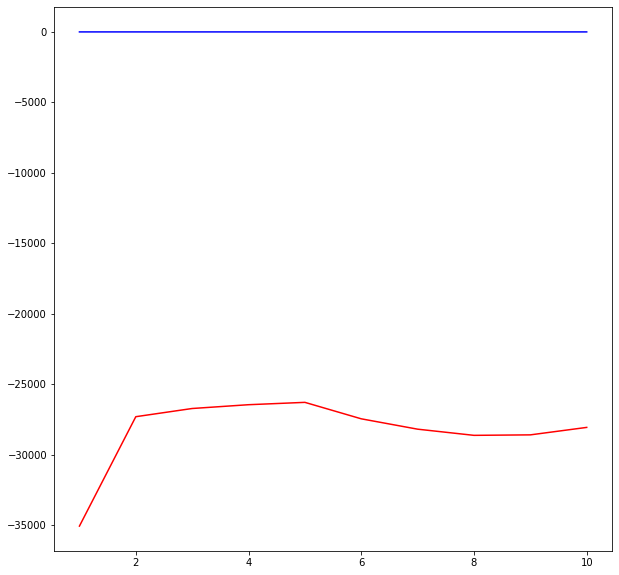

teszt score 19216.256966000117


In [0]:
test()

### Ensemble models
2 féle ensemble modelt néztem meg: a random forestet illetve a gradient boosting-t. Ezeket külön betanítattam és kimentettem pkl fájlba a kapott eredményeket. Ezeket a pkl fájlok eredményeit olvastatom itt is be és jelenítetetem meg. Az adatok összehasonlításához 2 féle score-t használtam fel: az r2 score-t, illetve a mean square error score-t.

#### Random forest model
A random forest model több döntési fát felépítve és annak az átlagát véve állapítja meg a végső eredményt. Az eredmény javítása végett egy összetett modellt alkalmaztam: egy Pipeline-be belehelyeztem egy feature selection-t a random forest tanítása előtt és erre alkalmaztam a GridSearchCV-t. Ezt azért csináltam, hogy modellspecifikus legyen a feature-selection. A SelectPercentile feature selectiont alkalmaztam, amely a megfelelő százalékát tartotta meg a feature-knek (legjobbakat csak, amely összefüggésben van az output értékekekkel), valamint validációs halmaz gyártásához StratifiedKFold-t használtam ezen felül, hogy jobb eredmény érjek el, alkalmaztam a random keverést a validációs halmaz kiválasztásakor, hogy ne ugyanabban a sorrendben nézze meg a validációs halmazon a példákat. Összesen 10 részre osztattam fel a train halmazt és úgy validáltam.

##### Alkalmazott függvények a modell eredményének megtekintésére
Egy külön osztályt írtam a modell tanítására és tesztelésére, amelyben a függvények mind megtalálhatóak. Ezeket másoltam most ki ide kicsit módosítva.

In [18]:
#https://colab.research.google.com/drive/1uvHuizCBqFgvbCwEhK7FvU8JW0AfxgJw alapjan
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
sys.path.append('/content/gdrive/My Drive/gépi tanulás beadandó/files')
[x_train,x_test,y_train,y_test]=[np.loadtxt('/content/gdrive/My Drive/gépi tanulás beadandó/files/x_train.csv', delimiter=",", dtype=float),
                                 np.loadtxt('/content/gdrive/My Drive/gépi tanulás beadandó/files/x_test.csv',delimiter=",", dtype=float),
                   np.loadtxt('/content/gdrive/My Drive/gépi tanulás beadandó/files/y_train.csv',delimiter=",", dtype=float), 
                   np.loadtxt('/content/gdrive/My Drive/gépi tanulás beadandó/files/y_test.csv',delimiter=",", dtype=float)]

In [0]:
 import matplotlib.pyplot as plt
 import matplotlib.tri as mtri
 def examine_output_randomforest(filename, szog1, szog2):
        df=pd.read_pickle(filename)
        best_of=df[df['rank_test_score'] == 1]
        fig=plt.figure()
        ax=fig.add_subplot(111, projection='3d')
        triang=mtri.Triangulation(df['param_rfr__n_estimators'],
                                  df['param_sp__percentile'])
        ax.plot_trisurf(triang, df['mean_test_score'], cmap='Blues')

        ax.plot_trisurf(triang, df['mean_train_score'], cmap='Reds')

        fake2Dline = mpl.lines.Line2D([0], [0], linestyle="none", c='b', marker='o')
        fake2Dline2 = mpl.lines.Line2D([1], [1], linestyle="none", c='r', marker='o')
        ax.legend([fake2Dline, fake2Dline2], ['Validációs score', 'Train score'], numpoints=1)

        ax.scatter(df[df['rank_test_score'] == 1]['param_rfr__n_estimators'].values, df[df['rank_test_score'] == 1]['param_sp__percentile'].values,
                   df[df['rank_test_score'] == 1]['mean_test_score'].values, marker='.', s=100, c="red", alpha=1.0)
        ax.view_init(elev=szog1, azim=szog2)

        ax.set_xlabel('X: random forestek szama')
        ax.set_ylabel('Y: featurek megtarott szazaleka')
        ax.set_zlabel('Z: elert eredmeny')
        plt.show()
        return best_of[['param_rfr__n_estimators', 'param_sp__percentile', 'mean_test_score', 'mean_train_score']]

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectPercentile, mutual_info_regression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

def test_random_forest(filepath, score):
      df=pd.read_pickle(filepath)
      best_of=df[df['rank_test_score'] == 1]

      rfr = RandomForestRegressor(n_estimators=best_of['param_rfr__n_estimators'].values[0])
      sp = SelectPercentile(mutual_info_regression, percentile=best_of['param_sp__percentile'].values[0])
      model= Pipeline(steps=[('sp', sp), ('rfr', rfr)])

      model.fit(x_train, y_train)
      y_pred=model.predict(x_test)
      if score=='r2':
          return r2_score(y_test, y_pred)
      else:
          return mean_squared_error(y_test, y_pred)

##### Az első probálkozásom
Simán a fent leírtakat alkalmaztam az adathalmazon, nem csináltam sok előtanítást, az adatok feldolgozásában alkalmazott előtanításokat kivéve.

###### R2-score alapján
Az ábrán látható piros pötty jelzi a validációs halmazon elért legjobb eredményt. Jól látszódik, hogy nem a legjobb helyen található a validációs optimum, ugyanis erősen túltanult, vagy nem megfelelő a modellünk, ugyanis a train halmazon elért eredménynél sokkal kisebb a validációs halmazon elért eredmény abban a pontban. Megnéztem ugyanezt az eredményt más score-ral is, és majd látható lesz, hogy ugyananazt az eredményt kaptam, vagy hasonlót.

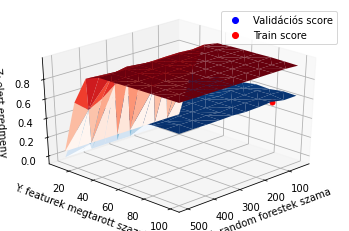

,param_rfr__n_estimators,param_sp__percentile,mean_test_score,mean_train_score
29,150,100,0.657663,0.946275


In [0]:
examine_output_randomforest('/content/gdrive/My Drive/gépi tanulás beadandó/random_forest_r2_10.pkl',30,45)

In [0]:
test_random_forest('/content/gdrive/My Drive/gépi tanulás beadandó/random_forest_r2_10.pkl','r2')

0.6322022035508905

Összesen 0.657663-t kaptam a validációs score-ra, 0.946275-t a train score-ra, 0.6449805932496205-t a teszt score-ra.


Az r2 score magyarul "meghatározási együttható", ami megadja, hogy mennyire illeszkedik jól rá a modell az adatpontjainkra. Ha ez az érték 1, akkor tökéletesen illeszkedik, vagy ha 1-hez közelítő érték, majdnem tökéletesen illeszkedik. Azaz a train halmazon erősen túltanult, a teszt és a validációs halmazon hasonló eredményt ért el, amely jobb, mintha konstans értéket (átlagot) adott volna mindig vissza (akkor ad az r2 score 0-t).

###### mean squared error-score alapján
Megpróbálkoztam egy általánosabb score-ral, amely az valós adatpontoktól való eltérések négyzetes összegének átlagát számolja ki.

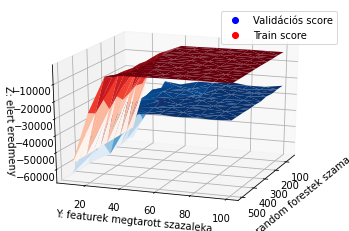

,param_rfr__n_estimators,param_sp__percentile,mean_test_score,mean_train_score
64,350,50,-23592.047977,-3508.065628


In [0]:
examine_output_randomforest('/content/gdrive/My Drive/gépi tanulás beadandó/random_forest_neg_mean_squared_error_10.pkl',20,20)

In [0]:
test_random_forest('/content/gdrive/My Drive/gépi tanulás beadandó/random_forest_neg_mean_squared_error_10.pkl','mean_squared_error')

5785.807293879397

Valamennyivel most jobbat értünk a teszt halmazon, mint a validációs halmazon, de most hasonlóan alakult, hogy a train és a validációs között nagy volt a különbség. A teszt halmazon 7351.076486830555-t, a validációs halmazon 23592.047977-t (negált mean squared error-ral tért vissza, mert maximalizált a GridSearchCV), a train halmazon pedig 3508.065628-t. Elmondható, hogy a validációs halmazon viszonylag rossz eredményeket ért el a modellem. 

##### A második probálkozásom

Másodjára megpróbáltam valamilyen előfeldolgozást csinálni a modellemre és a feautre-kre a StandardScaler()-t használtam, ami standardizálja a feature-ket,
$\frac{x-átlag}{szórás}$-t számol minden feature-ra.

In [0]:
from sklearn.preprocessing import StandardScaler
def random_tree_with_standard_data_test(filepath, score):
      scaler = StandardScaler()
      x_train_2 = x_train.copy()
      x_test_2 = x_test.copy()

      scaler.fit_transform(x_train_2)
      scaler.transform(x_test_2)
      df=pd.read_pickle(filepath)
      best_of=df[df['rank_test_score'] == 1]

      rfr = RandomForestRegressor(n_estimators=best_of['param_rfr__n_estimators'].values[0])
      sp = SelectPercentile(mutual_info_regression, percentile=best_of['param_sp__percentile'].values[0])
      model= Pipeline(steps=[('sp', sp), ('rfr', rfr)])

      model.fit(x_train_2, y_train)
      y_pred=model.predict(x_test_2)
      if score=='r2':
          return r2_score(y_test, y_pred)
      else:
          return mean_squared_error(y_test, y_pred)

###### R2-score alapján
Hasonlóan megvizsgáltam, mit kapok az r2 score-ra, valójában itt is az legjobb r2 score-t elért értékű validációs halmazon elért adatokat tartottam meg.

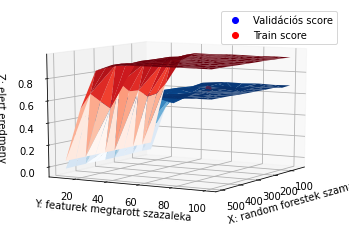

,param_rfr__n_estimators,param_sp__percentile,mean_test_score,mean_train_score
46,250,70,0.688708,0.945699


In [0]:
examine_output_randomforest('/content/gdrive/My Drive/gépi tanulás beadandó/random_forest_r2_standard.pkl',10,30)

Még mindig nagy a különbség a teszt és a train halmaz között, de sikerült ezt a különbséget valamennyivel csökkentenünk, hasonló eredményt értem el a train halmazon, mint a nem standardizált verzióban, viszont 0.657663-ról 0.688708-ra nőtt meg a validációs halmazon elért eredmény.

In [0]:
random_tree_with_standard_data_test('/content/gdrive/My Drive/gépi tanulás beadandó/random_forest_r2_standard.pkl', 'r2')

0.6029924982605569

A teszt halmazon viszont gyengébb eredményt értem el, így önmagában a standardizálás nem elég, még próbálkoztam, de azért megnéztem a mean squared error-ra kapott eredményeket is.

###### mean squared error-score alapján
Hasonlóan az eddigiekhez, megnéztem, hogy a mean squared error-ral optimalizálva mekkora értékeket kapok.

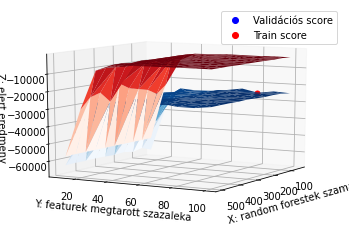

,param_rfr__n_estimators,param_sp__percentile,mean_test_score,mean_train_score
28,150,90,-23329.404043,-3376.114333


In [0]:
examine_output_randomforest('/content/gdrive/My Drive/gépi tanulás beadandó/random_forest_neg_mean_squared_error_standard.pkl',10,30)

Valamelyest sikerült javítanom a trainen és a validációs halmazon elért eredményen.

In [0]:
random_tree_with_standard_data_test('/content/gdrive/My Drive/gépi tanulás beadandó/random_forest_neg_mean_squared_error_standard.pkl', 'mean_squared_error')

7991.176209216604

A kapott érték a nem standardizált értékhez képest, ami 7351.076486830555 volt, romlott itt is, jól látszik, hogy ez még nem elég, további transzformációk szükségesek.

##### A harmadik probálkozásom
Harmadik próbálkozásként megpróbáltam az adatok standardizálása után a polinomiális featureit venni az adatoknak a 2-d fokú PolynomialFeatures() segítségével és arra tanítattni a modellemet.

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
def random_tree_with_standard_poly_data_test(filepath, score):
      scaler = StandardScaler()
      x_train_2 = x_train.copy()
      x_test_2 = x_test.copy()

      scaler.fit_transform(x_train_2)
      scaler.transform(x_test_2)
      df=pd.read_pickle(filepath)
      best_of=df[df['rank_test_score'] == 1]

      rfr = RandomForestRegressor(n_estimators=best_of['param_rfr__n_estimators'].values[0])
      sp = SelectPercentile(mutual_info_regression, percentile=best_of['param_sp__percentile'].values[0])
      poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)      
      model= Pipeline(steps=[('sp', sp),('poly', poly),('rfr', rfr)])

      model.fit(x_train_2, y_train)
      y_pred=model.predict(x_test_2)
      if score=='r2':
          return r2_score(y_test, y_pred)
      else:
          return mean_squared_error(y_test, y_pred)

###### R2-score alapján

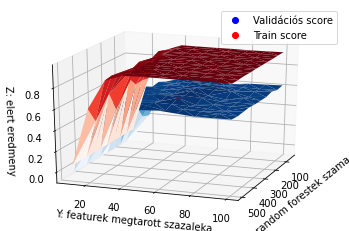

,param_rfr__n_estimators,param_sp__percentile,mean_test_score,mean_train_score
65,350,60,0.653518,0.940585


In [0]:
examine_output_randomforest('/content/gdrive/My Drive/gépi tanulás beadandó/random_forest_r2_poly.pkl',20,20)

Ez valamennyit lerontott a validációs halmazon elért 0.688708	eredményen, amit a standardizálással értünk el, a train halmazon meg hasonló eredményt értünk el.

In [0]:
random_tree_with_standard_poly_data_test('/content/gdrive/My Drive/gépi tanulás beadandó/random_forest_r2_poly.pkl', 'r2')

0.5803146305342974

Ez a transzformáció nagyon lerontotta egyben a teszt halmazon elért eredményt is, az eddigi 0.6 feletti r2 score-hoz képest ez jóval gyöngébb score. Még legeneráltattam mean squared errorra is a train-t illetve most megvizsgálom arra is, hogy mit kaptam:

###### mean squared error-score alapján

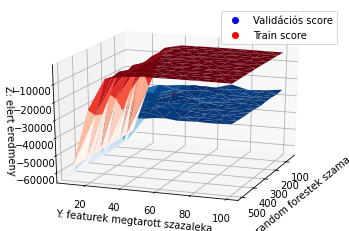

,param_rfr__n_estimators,param_sp__percentile,mean_test_score,mean_train_score
44,250,50,-24270.502498,-3643.530608


In [0]:
examine_output_randomforest('/content/gdrive/My Drive/gépi tanulás beadandó/random_forest_neg_mean_squared_error_poly.pkl',20,20)

Hasonlóan a train és a validációs score itt is romlott, a validációs score 23329.404043-ról 24270.502498-ra romlott. Ugyanez igaz a train score-ra is, 3376.114333-ról 3643.530608-ra romlott.	

In [0]:
random_tree_with_standard_poly_data_test('/content/gdrive/My Drive/gépi tanulás beadandó/random_forest_neg_mean_squared_error_poly.pkl', 'mean_squared_error')

8870.322060630708

Ebben az esetben a teszt eredménye javult a sima standardizáláshoz képest. Míg standardizálás esetén 7511.915413322526 lett a teszt eredménye, most ez 6790.873750409506-ra javult fel.

#### Gradient boosting
Hasonlóan a random foresthez, hogy a tanítás eredményét javítsam, egy SelectPercentile() feature selection-t is alkalmaztam a modellemben és GirdSearchCV-vel a 2 eddig vizsgált score szerint kerestem a legjobb eredményt a validációs halmazon, ez alapján állítottam be a feature selection percentile adattagját, amely a megtartott feature-k százalékát adja meg. További score amit beállítottam a gradient boosting tanítás loss függvénye, valamint a tanítási ráta.

Mivel így a függvényünk 4 dimenziós lesz a metaparaméterek függvényében, ezért a megjelenítéskor a 3 féle loss függvényre kapott értékeket külön-külön jelenítettem meg.

A gradient boosting method is döntési fán alapuló módszer, amely valamilyen megaodtt learning rate-el változtatva a fa tulajdonságain gradiens-módszerrel keresi a legjobb metaparméter-beállítást. A gradiens módszernek a loss függvényét is mi adjuk meg, ami alapján számolja a gradienst, azaz aminek a minimumát keresi meg.

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd

def examine_output_gbr(filename):
  df = pd.read_pickle(filename)
  best_of = df[df['rank_test_score'] == 1]
  
  for loss in ['ls', 'lad', 'huber', 'quantile']:
      fig = plt.figure()
      ax = fig.add_subplot(111, projection='3d')
      df2=df[df['param_gbr__loss']==loss]
      triang = mtri.Triangulation(df2['param_sp__percentile'],
                                  df2['param_gbr__learning_rate'])
      ax.plot_trisurf(triang, df2['mean_test_score'], cmap='Blues')
      fake2Dline3 = mpl.lines.Line2D([0], [0], linestyle="none")
      fake2Dline = mpl.lines.Line2D([0], [0], linestyle="none", c='b', marker='o')
      fake2Dline2 = mpl.lines.Line2D([1], [1], linestyle="none", c='r', marker='o')
      ax.legend([fake2Dline3, fake2Dline, fake2Dline2], [loss, 'Validációs score', 'Train score'], numpoints=1)

      ax.scatter(df2['param_sp__percentile'], df2['param_gbr__learning_rate'],
                  df2['mean_test_score'], marker='.', s=10, c="black", alpha=0.5)
      ax.plot_trisurf(triang, df2['mean_train_score'], cmap='Reds')

      ax.scatter(df2['param_sp__percentile'], df2['param_gbr__learning_rate'],
                  df2['mean_train_score'], marker='.', s=10, c="black", alpha=0.5)
      ax.view_init(elev=60, azim=-45)
      if df[df['rank_test_score'] == 1]['param_gbr__loss'].values[0]==loss:
          ax.scatter(df[df['rank_test_score'] == 1]['param_sp__percentile'].values,
                      df[df['rank_test_score'] == 1]['param_gbr__learning_rate'].values,
                      df[df['rank_test_score'] == 1]['mean_test_score'].values, marker='.', s=100, c="red",
                      alpha=1.0)
          ax.scatter(df[df['rank_test_score'] == 1]['param_sp__percentile'].values,
                      df[df['rank_test_score'] == 1]['param_gbr__learning_rate'].values,
                      df[df['rank_test_score'] == 1]['mean_train_score'].values, marker='.', s=100, c="red",
                      alpha=1.0)

      ax.view_init(elev=60, azim=45)
      ax.set_xlabel('X:featurek megtarott szazaleka')
      ax.set_ylabel('Y:tanulási ráta')
      ax.set_zlabel('Z:score értéke')
      plt.show()
  return best_of[['param_gbr__loss', 'param_sp__percentile','param_gbr__learning_rate', 'mean_test_score','mean_train_score']]

##### Az első probálkozásom

A feautre selection-t tartalmazó modellel próbálkoztam először. A tanítás során nem használtam előfeldolgozást azon kívül, amit az adatok feldolgozásánál fordult elő.

###### R2-score alapján


In [0]:
[x_train,x_test,y_train,y_test]=[np.loadtxt('/content/gdrive/My Drive/gépi tanulás beadandó/files/x_train.csv', delimiter=",", dtype=float),
                                 np.loadtxt('/content/gdrive/My Drive/gépi tanulás beadandó/files/x_test.csv',delimiter=",", dtype=float),
                   np.loadtxt('/content/gdrive/My Drive/gépi tanulás beadandó/files/y_train.csv',delimiter=",", dtype=float), 
                   np.loadtxt('/content/gdrive/My Drive/gépi tanulás beadandó/files/y_test.csv',delimiter=",", dtype=float)]

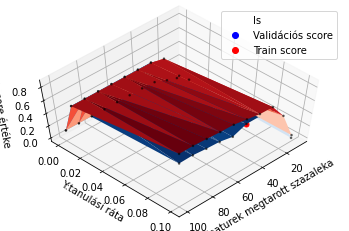

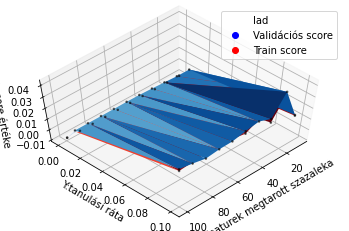

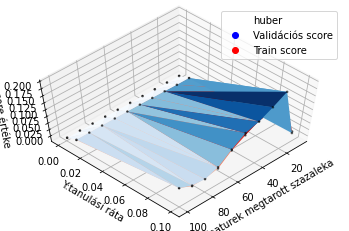

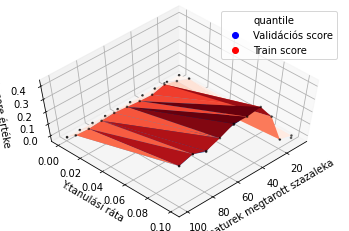

,param_gbr__loss,param_sp__percentile,param_gbr__learning_rate,mean_test_score,mean_train_score
4,ls,50,0.1,0.701045,0.771756


In [0]:
examine_output_gbr('/content/gdrive/My Drive/gépi tanulás beadandó/gbr_r2.pkl')

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectPercentile, mutual_info_regression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
def test_gbr(filepath, score):
      df=pd.read_pickle(filepath)
      best_of=df[df['rank_test_score'] == 1]

      gbr = GradientBoostingRegressor(loss=best_of['param_gbr__loss'].values[0],
                            learning_rate=best_of['param_gbr__learning_rate'].values[0])
      sp = SelectPercentile(mutual_info_regression, percentile=best_of['param_sp__percentile'].values[0])
      model= Pipeline(steps=[('sp', sp), ('gbr', gbr)])

      model.fit(x_train, y_train)
      y_pred=model.predict(x_test)
      if score=='r2':
          return r2_score(y_test, y_pred)
      else:
          return mean_squared_error(y_test, y_pred)

In [0]:
test_gbr('/content/gdrive/My Drive/gépi tanulás beadandó/gbr_r2.pkl', 'r2')

0.7149848030173593

A gradientboosting regresszióval jóval jobb eredményt tudtam elérni a validációs és a hozzá tartozó train halmazon is. A teszt halmazon elért eredmény is hasonló, sőt jobb mint a teszt halmazon elért eredmény. Ennek megfelelően ez a modell jobban illik a feladatunkhoz, mint a random forrest modellje.

###### mean squared error alapján

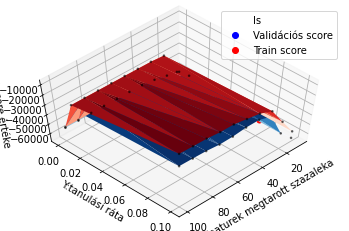

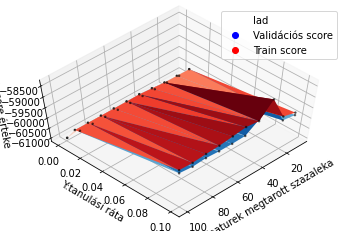

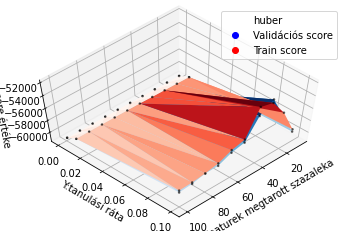

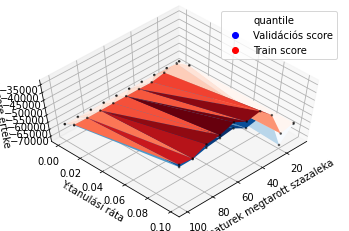

,param_gbr__loss,param_sp__percentile,param_gbr__learning_rate,mean_test_score,mean_train_score
3,ls,40,0.1,-22187.888285,-15949.894204


In [0]:
examine_output_gbr('/content/gdrive/My Drive/gépi tanulás beadandó/gbr_neg_mean_squared_error.pkl')

In [0]:
test_gbr('/content/gdrive/My Drive/gépi tanulás beadandó/gbr_neg_mean_squared_error.pkl', 'mean_squared_error')

9373.768216316297

Mean squared error-szerinti összehasonlítás szerint jóval rosszabb eredményt értünk el a mind a teszt, mint a train és mind a validációs halmazon, mint a random forest esetén, azaz nem mindegy, hogy milyen score alapján hasonlítjuk össze a modelleken elért eredményeket.